# Hello, LSTM!

In this project we'd like to explore the basic usage of LSTM (Long Short-Term Memory) which is a flavor of RNN (Recurrent Neural Network).

- A nice theorerical tutorial is [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding--LSTMs/).
- Keras docs: http://keras.io/layers/recurrent/
- Keras examples: https://github.com/fchollet/keras/tree/master/examples
  - https://github.com/fchollet/keras/blob/master/examples/imdb_bidirectional_lstm.py
  - https://github.com/fchollet/keras/blob/master/examples/imdb_cnn_lstm.py
  - https://github.com/fchollet/keras/blob/master/examples/imdb_lstm.py
  - https://github.com/fchollet/keras/blob/master/examples/lstm_text_generation.py

## The goals

- Define the problem that LSTM can solve.
- Show a basic working example of LSTM usage in Keras.
- Try to learn some basic patterns in simple sequences.

## Setup

Install keras, tensorflow and the basic ML/Data Science libs (numpy/matplotlib/etc.).

Set TensorFlow as the keras backend in `~/.keras/keras.json`:

```json
{"epsilon": 1e-07, "floatx": "float32", "backend": "tensorflow"}
```

In [177]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('image', interpolation='nearest', cmap='gray')
mpl.rc('figure', figsize=(20,10))

## Basic problems

### Prediction of the next value of sequence

#### sequence of (110)+

Just a repeated pattern:

```
110110110110110...
```

### Classification of sequences

The inputs/outputs must be tensors of shape `(samples, time_steps, features)`.

In this case (1, len(X), 1).

For simplicity we have a single training example and no test test.

Predict one step ahead:

`(A, B, C, [D, E]) -> D`

In [250]:
X = np.array([[[1],[1],[0]], [[1],[0],[1]], [[0],[1],[1]]])
y = np.array([[1], [1], [0]])

# X = np.array([[[1],[0],[0]], [[0],[1],[0]], [[0],[0],[1]]])
# y = np.array([[1], [0], [0]])

In [233]:
# input: 3 samples of 3-step sequences with 1 feature
# input: 3 samples with 1 feature
X.shape, y.shape

((3, 3, 1), (3, 1))

## Basic usage of LTSM layers in Keras

### Notes:

- the first layer must specify the input shape
- TensorFlow needs explicit length of series, so `input_shape` or `batch_input_shape` must be used, not just `input_dim`
- when specifying `batch_input_shape` in LSTM, we need to explicitly add `batch_size` to `model.fit()`

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, TimeDistributedDense
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [ ]:
# model = Sequential()
# # return_sequences=False
# model.add(LSTM(output_dim=1, input_shape=(3, 1)))
# # since the LSTM layer has only one output after activation we can directly use as model output
# model.add(Activation('sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', class_mode='binary')

# This models is probably too easy and it is not able to overfit on the training dataset.
# For LSTM output dim 3 it works ok (after a few hundred epochs).

In [251]:
model = Sequential()
model.add(LSTM(output_dim=3, input_shape=(3, 1)))
# Since the LSTM layer has multiple outputs and model has single one
# we need to add another Dense layer with single output.
# In case the LSTM would return sequences we would use TimeDistributedDense layer.
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [252]:
model.compile(loss='binary_crossentropy', optimizer='adam', class_mode='binary')

In [253]:
model.count_params()

64

In [254]:
model.fit(X, y, nb_epoch=500, show_accuracy=True)

Epoch 1/500
3/3 [==============================] - 0s - loss: 0.7282 - acc: 0.3333
Epoch 2/500
3/3 [==============================] - 0s - loss: 0.7274 - acc: 0.3333
Epoch 3/500
3/3 [==============================] - 0s - loss: 0.7265 - acc: 0.3333
Epoch 4/500
3/3 [==============================] - 0s - loss: 0.7257 - acc: 0.3333
Epoch 5/500
3/3 [==============================] - 0s - loss: 0.7249 - acc: 0.3333
Epoch 6/500
3/3 [==============================] - 0s - loss: 0.7241 - acc: 0.3333
Epoch 7/500
3/3 [==============================] - 0s - loss: 0.7233 - acc: 0.3333
Epoch 8/500
3/3 [==============================] - 0s - loss: 0.7225 - acc: 0.3333
Epoch 9/500
3/3 [==============================] - 0s - loss: 0.7217 - acc: 0.3333
Epoch 10/500
3/3 [==============================] - 0s - loss: 0.7209 - acc: 0.3333
Epoch 11/500
3/3 [==============================] - 0s - loss: 0.7201 - acc: 0.3333
Epoch 12/500
3/3 [==============================] - 0s - loss: 0.7193 - acc: 0.3333
E

3/3 [==============================] - 0s


(-0.1, 1.1)

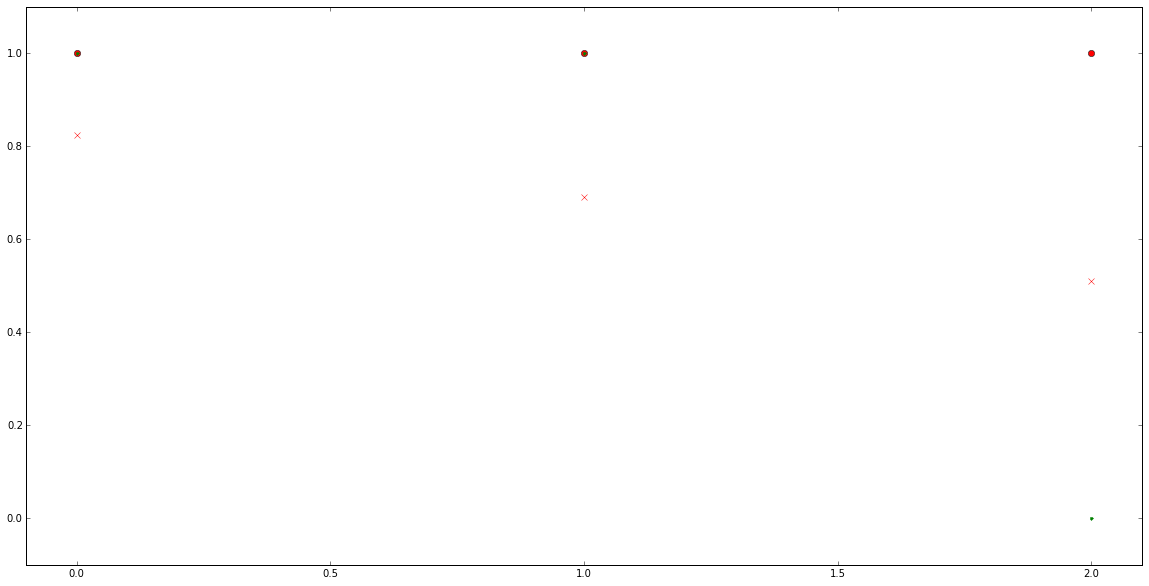

In [255]:
plt.plot(model.predict_proba(X).flatten(), 'rx')
plt.plot(model.predict_classes(X).flatten(), 'ro')
plt.plot(y.flatten(), 'g.')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.1)

In [256]:
model.predict_proba(X)

3/3 [==============================] - 0s


array([[ 0.82438767],
       [ 0.69011641],
       [ 0.50994909]])

In [257]:
model.predict_classes(X)

3/3 [==============================] - 0s


array([[1],
       [1],
       [1]], dtype=int32)

In [258]:
# del model

LSTM weight meanings:

- http://colah.github.io/posts/2015-08-Understanding-LSTMs/
- source code [LSTM in recurrent.py](https://github.com/fchollet/keras/blob/master/keras/layers/recurrent.py#L431)

```
[W_i, U_i, b_i,
 W_c, U_c, b_c,
 W_f, U_f, b_f,
 W_o, U_o, b_o]
```

Type of weights:
- W - weight matrix -  from input to output
- b - bias vector - from input to output
- U - weight matrix - from hidden to output (it has no companion biases)

Usage of weights:
- i - input - to control whether to modify the cell state
- c - candidate - a new value of cell state
- f - forget - to remove the previous cell state
- o - output - to control whether to output something

Inputs and outputs of a LSTM unit:
- value, cell state, hidden state

In [259]:
weight_names = ['W_i', 'U_i', 'b_i',
 'W_c', 'U_c', 'b_c',
 'W_f', 'U_f', 'b_f',
 'W_o', 'U_o', 'b_o']

In [260]:
weight_shapes = [w.shape for w in model.get_weights()]
# for n, w in zip(weight_names, weight_shapes):
#     print(n, ':', w)
print(weight_shapes)

[(1, 3), (3, 3), (3,), (1, 3), (3, 3), (3,), (1, 3), (3, 3), (3,), (1, 3), (3, 3), (3,), (3, 1), (1,)]


In [261]:
def pad_vector_shape(s):
    return (s[0], 1) if len(s) == 1 else s

all_shapes = np.array([pad_vector_shape(s) for s in weight_shapes])
all_shapes

array([[1, 3],
       [3, 3],
       [3, 1],
       [1, 3],
       [3, 3],
       [3, 1],
       [1, 3],
       [3, 3],
       [3, 1],
       [1, 3],
       [3, 3],
       [3, 1],
       [3, 1],
       [1, 1]])

In [262]:
for w in model.get_weights():
    print(w)

[[-0.03112559  0.8660714   0.64888912]]
[[-0.45802712 -0.06128767 -0.89763218]
 [-0.06550674  0.03961982  1.05407453]
 [-0.4888497   0.98513061  1.33941746]]
[ 0.65779108  0.5671491   0.68662328]
[[ 0.69823277  1.03702843  1.56086171]]
[[-0.51165015 -0.2635794   0.94082028]
 [ 0.0139778  -0.04145665 -0.41632849]
 [ 0.39988595 -1.61541593  0.86261189]]
[ 0.32642099 -0.2168739  -0.63371056]
[[-0.89996403 -0.25126228  1.32094765]]
[[ 1.21803594 -1.00880325  0.51284856]
 [ 0.93082637  0.04172242  1.33407831]
 [-0.09687913 -0.89591932  0.96911085]]
[ 1.57698119  0.86581093  1.49436665]
[[-0.371564    1.31869125  1.02940512]]
[[-0.97331756  0.92339629  0.98385638]
 [-0.62391496  1.63483477  0.29820654]
 [ 0.06711823  0.35198104 -0.30188492]]
[ 0.66007471  0.26297823  0.678976  ]
[[ 1.52925777]
 [-1.38116515]
 [ 0.14560407]]
[ 0.29524684]


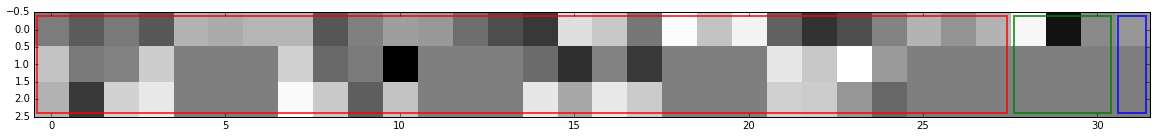

In [263]:
all_weights = np.zeros((all_shapes[:,0].sum(axis=0), all_shapes[:,1].max(axis=0)))

def add_weights(src, target):
    target[0] = src[0]
    target[1:4] = src[1]
    target[4:7,0] = src[2]
    
for i in range(4):
    add_weights(model.get_weights()[i*3:(i+1)*3], all_weights[i*7:(i+1)*7])

all_weights[28:31,0] = model.get_weights()[12].T
all_weights[31,0] = model.get_weights()[13]
    
plt.imshow(all_weights.T)


from matplotlib.patches import Rectangle

ax = plt.gca()
ax.add_patch(Rectangle([-.4, -0.4], 28-0.2, 3-0.2, fc='none', ec='r', lw=2, alpha=0.75))
ax.add_patch(Rectangle([28 - .4, -0.4], 3-0.2, 3-0.2, fc='none', ec='g', lw=2, alpha=0.75))
ax.add_patch(Rectangle([31 - .4, -0.4], 1-0.2, 3-0.2, fc='none', ec='b', lw=2, alpha=0.75))

plt.savefig('weights_110.png')